In [1]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import numpy as np
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
import pickle

training_file = "traffic-sign-data/train.p"
testing_file = "traffic-sign-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [3]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_train_original = X_train
X_test_original = X_test

X_train_standardised = (X_train - X_train.mean()) / np.std(X_train)
X_test_standardised = (X_test - X_test.mean()) / np.std(X_test)
X_train_normalised = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test_normalised = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

print("Min: %d" % np.min(X_train_normalised))
print("Max: %d" % np.max(X_train_normalised))
print("Mean: %d" % np.mean(X_train_normalised))

y_train = np_utils.to_categorical(y_train,num_classes=43)
y_test = np_utils.to_categorical(y_test, num_classes=43)

# Normalised input
X_train = X_train_normalised
X_test = X_test_normalised

batch_size = 100
nb_epoch = 100

from sklearn.model_selection import train_test_split

# TODO: Split some of the training data into a validation dataset.
X_train, X_val, y_train, y_val = train_test_split(\
    X_train, y_train, test_size=0.2, random_state=42)

print("X_train: ", len(X_train))
print("y_train: ", len(y_train))
print("X_val: ", len(X_val))
print("y_val: ", len(y_val))


Min: 0
Max: 0
Mean: 0
X_train:  31367
y_train:  31367
X_val:  7842
y_val:  7842


In [4]:
model = Sequential()
# model.add(Dense(512,activation="relu", input_shape=(32*32*3,)))
# model.add(Dense(512,activation="relu"))
# model.add(Dense(256,activation="relu"))
model.add(Dense(43,activation="softmax",input_shape=(32*32*3,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 43)                132139    
Total params: 132,139
Trainable params: 132,139
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr=0.001),
             metrics=["accuracy"])

In [6]:
model.fit(X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3]),
          y_train,batch_size=batch_size,epochs=10)

Epoch 1/10
31367/31367 [==============================] - 4s 121us/step - loss: 1.8525 - acc: 0.5497
Epoch 2/10
31367/31367 [==============================] - 4s 122us/step - loss: 1.0464 - acc: 0.7716
Epoch 3/10
31367/31367 [==============================] - 4s 119us/step - loss: 0.8062 - acc: 0.8313
Epoch 4/10
31367/31367 [==============================] - 4s 118us/step - loss: 0.6763 - acc: 0.8613
Epoch 5/10
31367/31367 [==============================] - 4s 121us/step - loss: 0.5860 - acc: 0.8832
Epoch 6/10
31367/31367 [==============================] - 4s 120us/step - loss: 0.5285 - acc: 0.8938
Epoch 7/10
31367/31367 [==============================] - 4s 120us/step - loss: 0.4802 - acc: 0.9022
Epoch 8/10
31367/31367 [==============================] - 4s 124us/step - loss: 0.4410 - acc: 0.9112
Epoch 9/10
31367/31367 [==============================] - 4s 123us/step - loss: 0.4077 - acc: 0.9202
Epoch 10/10
31367/31367 [==============================] - 4s 120us/step - loss: 0.3829 - a

In [7]:
model.evaluate(X_val.reshape(X_val.shape[0],X_val.shape[1]*X_val.shape[2]*X_val.shape[3]),y_val,batch_size=batch_size)

7842/7842 [==============================] - 1s 68us/step


[0.41296085483472705, 0.91366998416919609]

In [8]:
model.evaluate(X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3]),y_test,batch_size=batch_size)

12630/12630 [==============================] - 1s 61us/step


[0.78116676921610406, 0.82288202362596663]

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


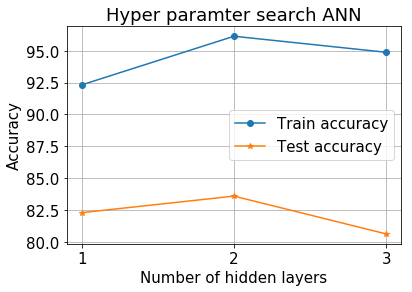

In [31]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}

train_acc1 = np.array([92.32,96.14,94.88])
test_acc1 = np.array([82.28,83.58,80.61])
num_of_hidden_layers = np.array([1,2,3])
plt.rc('font', **font)
plt.figure()
_,ax = plt.subplots()
ax.set_title('Hyper paramter search ANN')
ax.set_xlabel("Number of hidden layers")
ax.set_ylabel('Accuracy')
plt.plot(num_of_hidden_layers,train_acc1,'o-',label="Train accuracy")
plt.plot(num_of_hidden_layers,test_acc1,'*-',label="Test accuracy")
ax.legend(loc="center right")
plt.grid(True)
fig = plt.gcf()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# fig.set_size_inches(15, 10, forward=True)

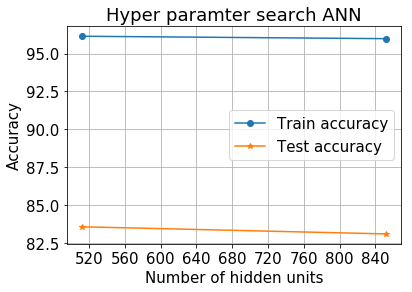

In [33]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}

train_acc2 = np.array([96.14,95.98])
test_acc2 = np.array([83.58,83.11])
num_of_hidden_layers = np.array([512,852])
plt.rc('font', **font)
plt.figure()
_,ax = plt.subplots()
ax.set_title('Hyper paramter search ANN')
ax.set_xlabel("Number of hidden units")
ax.set_ylabel('Accuracy')
plt.plot(num_of_hidden_layers,train_acc2,'o-',label="Train accuracy")
plt.plot(num_of_hidden_layers,test_acc2,'*-',label="Test accuracy")
ax.legend(loc="center right")
plt.grid(True)
fig = plt.gcf()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# fig.set_size_inches(15, 10, forward=True)